# <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/undefined/external-big-data-smart-technology-flaticons-lineal-color-flat-icons-2.png"/> **NLP Research <br>BiLSTM CRF Named Entity Recognition**
## <img src="https://img.icons8.com/external-fauzidea-flat-fauzidea/64/undefined/external-man-avatar-avatar-fauzidea-flat-fauzidea.png"/> **`Dimas Dwi Putra`**
###<img src="https://img.icons8.com/color/64/000000/matrix-architect.png"/>**`Slamet Riyanto`**

# **BILSTM-CRF Model Architecture**

<center>

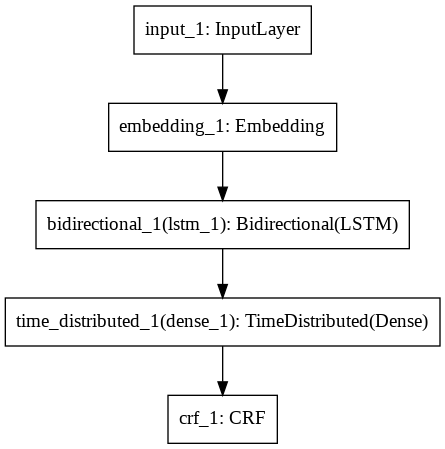

</center>

# **Connect google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Requirements Python Libraries**

In [ ]:
! pip install tensorflow==2.2.0
! pip install keras==2.3.1
! pip install git+https://www.github.com/keras-team/keras-contrib.git
! pip install sklearn-crfsuite
! pip install seqeval
! pip install pickle5

# **Import Python Libraries**

In [3]:
import pandas as pd
import numpy as np

# **Read NER Dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Rearch_Dimas/BILSTM-CRF-NER/input/ner_dataset.csv')

## **Display 20 Data pertama**

In [5]:
df.head(20)

Sentence #         Word  POS      Tag
0   Sentence: 0      studies  NNS        O
1   Sentence: 0           on   IN        O
2   Sentence: 0    magnesium   NN        O
3   Sentence: 0            s   NN        O
4   Sentence: 0    mechanism   NN        O
5   Sentence: 0           of   IN        O
6   Sentence: 0       action   NN        O
7   Sentence: 0           in   IN        O
8   Sentence: 0    digitalis   NN    plant
9   Sentence: 0      induced  VBD        O
10  Sentence: 0  arrhythmias  NNS  disease
11  Sentence: 1          the   DT        O
12  Sentence: 1    mechanism   NN        O
13  Sentence: 1           by   IN        O
14  Sentence: 1        which  WDT        O
15  Sentence: 1    magnesium   NN        O
16  Sentence: 1      affects  VBZ        O
17  Sentence: 1    digitalis   RB    plant
18  Sentence: 1      induced   JJ        O
19  Sentence: 1  arrhythmias   NN  disease

## **Display 20 Data Terakhir**

In [6]:
df.tail(20)

Sentence #           Word  POS      Tag
31674  Sentence: 1309             of   IN        O
31675  Sentence: 1309            the   DT        O
31676  Sentence: 1309       variance   NN        O
31677  Sentence: 1309             in   IN        O
31678  Sentence: 1309       cannabis   NN    plant
31679  Sentence: 1309            use   NN        O
31680  Sentence: 1309          these   DT        O
31681  Sentence: 1309       findings  NNS        O
31682  Sentence: 1309        suggest  VBP        O
31683  Sentence: 1309           that   IN        O
31684  Sentence: 1309           part   NN        O
31685  Sentence: 1309    association   NN        O
31686  Sentence: 1309        between   IN        O
31687  Sentence: 1309  schizophrenia   NN  disease
31688  Sentence: 1309            and   CC        O
31689  Sentence: 1309             is  VBZ        O
31690  Sentence: 1309            due   JJ        O
31691  Sentence: 1309             to   TO        O
31692  Sentence: 1309         shared  VBN        O
31693  Sentence: 1309        genetic   JJ        O

## **Menghitung Jumlah Baris dan Kolom**

In [7]:
df.shape

(31694, 4)

## **Displaying Tags**

In [8]:
df['Tag'].unique()

array(['O', 'plant', 'disease'], dtype=object)

## **Checking missing values, if data > 0 is `null`**

In [9]:
df.isnull().sum()

Sentence #    0
Word          0
POS           0
Tag           0
dtype: int64

## **Detail Dataset**

In [10]:
df.describe()

Sentence #   Word    POS    Tag
count           31694  31694  31694  31694
unique           1310   3089     32      3
top     Sentence: 267    and     NN      O
freq              101    930   9763  27882

# **Visualisasi**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## **Visualisasi Tag**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


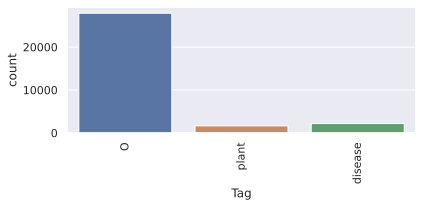

In [12]:
plt.figure(figsize=(6, 3))
ax = sns.countplot('Tag', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## **Visualisasi POS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


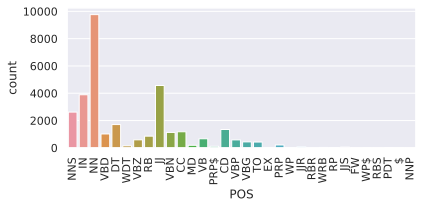

In [13]:
# Words distribution across POS
plt.figure(figsize=(6, 3))
ax = sns.countplot('POS', data=df, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

# **Class get sentence, the sentence will be list of tuples with its tag and pos**

In [14]:
class sentence(object):
    def __init__(self, df):
        self.n_sent = 1
        self.df = df
        self.empty = False
        agg = lambda s : [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(),
                                                       s['POS'].values.tolist(),
                                                       s['Tag'].values.tolist())]
        self.grouped = self.df.groupby("Sentence #").apply(agg)
        self.sentences = [s for s in self.grouped]
        
    def get_text(self):
        try:
            s = self.grouped['Sentence: {}'.format(self.n_sent)]
            self.n_sent +=1
            return s
        except:
            return None

## **Displaying one full sentence**

In [15]:
getter = sentence(df)
sentences = [" ".join([s[0] for s in sent]) for sent in getter.sentences]
sentences[1]

'the mechanism by which magnesium affects digitalis induced arrhythmias was studied in dogs with and without beta receptor'

## **Sentence With POS TAGGING**

In [16]:
sent = getter.get_text()
print(sent)

[('the', 'DT', 'O'), ('mechanism', 'NN', 'O'), ('by', 'IN', 'O'), ('which', 'WDT', 'O'), ('magnesium', 'NN', 'O'), ('affects', 'VBZ', 'O'), ('digitalis', 'RB', 'plant'), ('induced', 'JJ', 'O'), ('arrhythmias', 'NN', 'disease'), ('was', 'VBD', 'O'), ('studied', 'VBN', 'O'), ('in', 'IN', 'O'), ('dogs', 'NNS', 'O'), ('with', 'IN', 'O'), ('and', 'CC', 'O'), ('without', 'IN', 'O'), ('beta', 'NN', 'O'), ('receptor', 'NN', 'O')]


In [17]:
len(sentences[1])

121

## **Getting All Sentence in the Dataset**

In [18]:
sentences = getter.sentences

# **Preprocessing Data**

We will process our text data before feeding to the network.

Here word_to_index dictionary used to convert word into index value and tag_to_index is for the labels. So overall we represent each word as integer

## **Getting unique words and labels from data**

In [19]:
words = list(df['Word'].unique())
tags = list(df['Tag'].unique())

# Dictionary word:index pair
# word is key and its value is corresponding index
word_to_index = {w : i + 2 for i, w in enumerate(words)}
word_to_index["UNK"] = 1
word_to_index["PAD"] = 0

# Dictionary lable:index pair
# label is key and value is index.
tag_to_index = {t : i + 1 for i, t in enumerate(tags)}
tag_to_index["PAD"] = 0

idx2word = {i: w for w, i in word_to_index.items()}
idx2tag = {i: w for w, i in tag_to_index.items()}

In [20]:
print("Studies on magnesium's mechanism of action in digitalis -induced arrhythmias .")
print("..")
print("The word digitalis is identified by the index: {}".format(word_to_index["digitalis"]))
print("The word arrhythmias is identified by the index: {}".format(word_to_index["arrhythmias"]))

Studies on magnesium's mechanism of action in digitalis -induced arrhythmias .
..
The word digitalis is identified by the index: 10
The word arrhythmias is identified by the index: 12


In [21]:
print("label O is identified by the index: {}".format(tag_to_index["O"]))
print("label plant is identified by the index: {}".format(tag_to_index["plant"]))
print("label disease is identified by the index: {}".format(tag_to_index["disease"]))

label O is identified by the index: 1
label plant is identified by the index: 2
label disease is identified by the index: 3


# **Defining the parameters for LSTM network**

In [22]:
seqs_length = [len(s) for s in sentences]
max_seq_length = 3000 # max(seqs_length)
print(f"Max sequence length: {max_seq_length}")

num_words = len(words)
print(f"Number of words: {num_words}")

num_tags = len(tags)
print(f"Number of tags: {num_tags}")

Max sequence length: 3000
Number of words: 3089
Number of tags: 3


In [23]:
batch_size = 16 
epochs = 40
max_len = max_seq_length
embedding = 128 

## **Import Python Keras Libraries**

In [24]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.layers import LSTM, Dense, TimeDistributed, Embedding, Bidirectional, Dropout
from keras.models import Model, Input
from keras_contrib.layers import CRF
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import text_to_word_sequence

Using TensorFlow backend.


In [25]:
import warnings
warnings.filterwarnings("ignore")

## **Converting each sentence into list of index from list of tokens and Padding each sequence to have same length  of each word**

In [26]:
X = [[word_to_index[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_to_index["PAD"])

## **Convert label to index and padding**

In [27]:
y = [[tag_to_index[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen = max_len, sequences = y, padding = "post", value = tag_to_index["PAD"])

In [28]:
num_tag = df['Tag'].nunique()

## **Encoded labels**

In [29]:
y = [to_categorical(i, num_classes = num_tag + 1) for i in y]

## **Import Python Sklearn Libraries**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn_crfsuite.metrics import flat_classification_report, flat_f1_score, flat_recall_score, flat_precision_score, flat_accuracy_score
# from sklearn_crfsuite import metrics
from sklearn.metrics import f1_score
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [32]:
print("Size of training input data : ", X_train.shape)
print("Size of training output data : ", np.array(y_train).shape)
print("Size of testing input data : ", X_test.shape)
print("Size of testing output data : ", np.array(y_test).shape)

Size of training input data :  (1179, 3000)
Size of training output data :  (1179, 3000, 4)
Size of testing input data :  (131, 3000)
Size of testing output data :  (131, 3000, 4)


## **Check the first sentence before and after processing**

In [33]:
print('*****Before Processing first sentence : *****\n', ' '.join([w[0] for w in sentences[0]]))
print('*****After Processing first sentence : *****\n ', X[0])

*****Before Processing first sentence : *****
 studies on magnesium s mechanism of action in digitalis induced arrhythmias
*****After Processing first sentence : *****
  [2 3 4 ... 0 0 0]


## **First label before and after processing**

In [34]:
print('*****Before Processing first sentence : *****\n', ' '.join([w[2] for w in sentences[0]]))
print(f'*****After Processing first sentence : *****\n {y[0]}')

*****Before Processing first sentence : *****
 O O O O O O O O plant O disease
*****After Processing first sentence : *****
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


# **Bidirectional LSTM-CRF Network**

In [37]:
num_tags = df['Tag'].nunique()

# Model architecture
input = Input(shape = (max_len,))

# Embedding Layer
model = Embedding(input_dim = len(words) + 2, output_dim = embedding, input_length = max_len, mask_zero=False)(input)

# BI-LSTM Layer
model = Bidirectional(LSTM(units=embedding, return_sequences=True, dropout=0.2, recurrent_dropout=0.1, kernel_initializer=keras.initializers.he_normal()))(model)

# model = LSTM(units=embedding * 2, return_sequences=True, dropout=0.5, recurrent_dropout=0.5, kernel_initializer=keras.initializers.he_normal())(model)

# TimeDistributed Layer
model = TimeDistributed(Dense(num_tags, activation="relu"))(model)

# CRF layer
crf = CRF(num_tags+1)

# output
out = crf(model)

model = Model(input, out)

model.compile(optimizer="rmsprop", loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3000)              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 3000, 128)         395648    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 3000, 256)         263168    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 3000, 3)           771       
_________________________________________________________________
crf_2 (CRF)                  (None, 3000, 4)           40        
Total params: 659,627
Trainable params: 659,627
Non-trainable params: 0
_________________________________________________________________


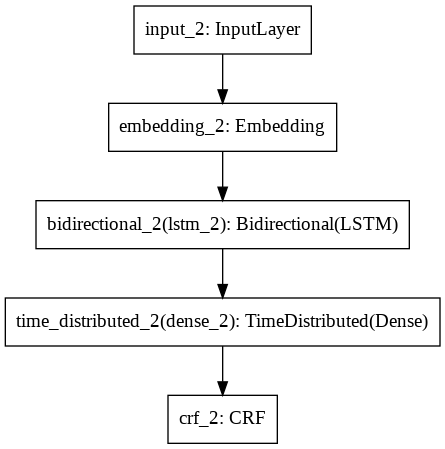

In [38]:
plot_model(model)

# **Making Checkpoint each epoch to check and save the best model performance till last and also avoiding further validation loss drop due to overfitting**

In [ ]:
checkpointer = ModelCheckpoint(
    filepath = '/content/drive/MyDrive/Rearch_Dimas/BILSTM-CRF-NER/output/model-{val_accuracy:.2f}.hdf5', 
    verbose = 1, 
    mode = 'min', 
    save_best_only = True, 
    monitor='val_loss')

In [ ]:
history = model.fit(
    X_train, 
    np.array(y_train), 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1, 
    callbacks=[checkpointer])

Train on 1061 samples, validate on 118 samples
Epoch 1/40
1061/1061 [==============================] - 438s 413ms/step - loss: 0.0571 - crf_viterbi_accuracy: 0.9776 - accuracy: 0.9920 - val_loss: 0.0102 - val_crf_viterbi_accuracy: 0.9923 - val_accuracy: 0.9924

Epoch 00001: val_loss improved from inf to 0.01019, saving model to /content/drive/MyDrive/Rearch_Dimas/BILSTM-CRF-NER/output/model-0.99.hdf5
Epoch 2/40
1061/1061 [==============================] - 454s 428ms/step - loss: 0.0091 - crf_viterbi_accuracy: 0.9968 - accuracy: 0.9920 - val_loss: 0.0083 - val_crf_viterbi_accuracy: 0.9990 - val_accuracy: 0.9990

Epoch 00002: val_loss improved from 0.01019 to 0.00827, saving model to /content/drive/MyDrive/Rearch_Dimas/BILSTM-CRF-NER/output/model-1.00.hdf5
Epoch 3/40
1061/1061 [==============================] - 519s 489ms/step - loss: 0.0075 - crf_viterbi_accuracy: 0.9990 - accuracy: 0.9920 - val_loss: 0.0073 - val_crf_viterbi_accuracy: 0.9990 - val_accuracy: 0.9990

Epoch 00003: val_los

# **Visualizing the performance of model**

In [ ]:
history.history.keys()

dict_keys(['val_loss', 'val_crf_viterbi_accuracy', 'val_accuracy', 'loss', 'crf_viterbi_accuracy', 'accuracy'])

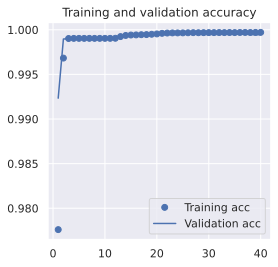

In [ ]:
acc = history.history['crf_viterbi_accuracy']
val_acc = history.history['val_crf_viterbi_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize = (4, 4))
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.savefig("/content/drive/MyDrive/Rearch_Dimas/BILSTM-CRF-NER/output/accuracy.png")
plt.legend()

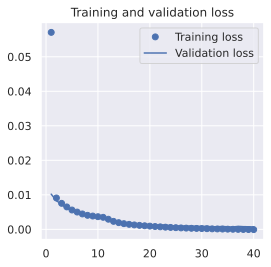

In [ ]:
plt.figure(figsize = (4, 4))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("/content/drive/MyDrive/Rearch_Dimas/BILSTM-CRF-NER/output/loss.png")
plt.show()

# **Evaluating the model on test set**

## **Evaluation**

## **Convert the index to tag**

In [ ]:
from keras.models import load_model
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_viterbi_accuracy

In [ ]:
model = load_model('/content/drive/MyDrive/Rearch_Dimas/BILSTM-CRF-NER/output/uji 7/model-1.00.hdf5', custom_objects={"CRF": CRF, 'crf_loss': crf_loss, 'crf_viterbi_accuracy': crf_viterbi_accuracy})

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_test_true = np.argmax(y_test, -1)

In [ ]:
y_pred = [[idx2tag[i] for i in row] for row in y_pred]
y_test_true = [[idx2tag[i] for i in row] for row in y_test_true]

In [ ]:
labels = list(df['Tag'].unique())
print(f"entities = {labels}")

entities = ['O', 'plant', 'disease']


In [ ]:
print(y_test_true)

[['O', 'O', 'O', 'O', 'O', 'plant', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'disease', 'disease', 'disease', 'disease', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD'

In [ ]:
print(y_pred)

[['O', 'O', 'O', 'O', 'O', 'plant', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'disease', 'disease', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PA

# **Precision, Recall, F-1 Scores**

# **BILSTM-CRF Scoress**

In [ ]:
import pandas as pd
scores_classification_reports = classification_report(y_test_true, y_pred, output_dict=True)
df_data_scores_average = pd.DataFrame(scores_classification_reports).transpose()
df_data_scores_average = df_data_scores_average.rename_axis('Entities')
print(df_data_scores_average)

              precision    recall  f1-score  support
Entities                                            
AD             1.000000  1.000000  1.000000    131.0
isease         0.774775  0.623188  0.690763    138.0
lant           0.892857  0.892857  0.892857    140.0
micro avg      0.895288  0.836186  0.864728    409.0
macro avg      0.889211  0.838682  0.861207    409.0
weighted avg   0.887332  0.836186  0.858986    409.0


In [ ]:
print("F1-score: {:.1%}".format(f1_score(y_test_true, y_pred)))

F1-score: 86.5%


# **Every execution model picks some random test sample from test set**

In [ ]:
i = np.random.randint(0,X_test.shape[0])
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
true = np.argmax(y_test[i], -1)

print("Sample number {} of {} (Test Set)".format(i, X_test.shape[0]))

print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_test[i], true, p[0]):
  if w != 0:
    print("{:15}: {:5} {}".format(words[w-2], idx2tag[t], idx2tag[pred]))

Sample number 120 of 131 (Test Set)
Word           ||True ||Pred
the            : O     O
mutagen        : O     O
sensitivity    : O     O
assay          : O     O
msa            : O     O
a              : O     O
phenotypic     : O     O
marker         : O     O
of             : O     O
dna            : O     O
damage         : O     O
response       : O     O
and            : O     O
repair         : O     O
capacity       : O     O
has            : O     O
been           : O     O
consistently   : O     O
shown          : O     O
to             : O     O
associate      : O     O
with           : O     O
risk           : O     O
tobacco        : plant plant
related        : O     O
cancers        : disease disease


# **Save the result**

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/Rearch_Dimas/BILSTM-CRF-NER/output/word_to_index.pickle', 'wb') as f:
  pickle.dump(word_to_index, f)

with open('/content/drive/MyDrive/Rearch_Dimas/BILSTM-CRF-NER/output/tag_to_index.pickle', 'wb') as f:
  pickle.dump(tag_to_index, f)

with open('/content/drive/MyDrive/Rearch_Dimas/BILSTM-CRF-NER/output/words.pickle', 'wb') as f:
  pickle.dump(words, f)

with open('/content/drive/MyDrive/Rearch_Dimas/BILSTM-CRF-NER/output/tags.pickle', 'wb') as f:
  pickle.dump(tags, f)